In [1]:
import sys
sys.path.append('../../')
sys.path.append('../common')

In [2]:
import numpy as np
from vehicle import Vehicle
from track import Track
from controller import PurePursuit, PIDController, PurePursuitPlusPID
from simulation import Simulation, show_img

In [3]:
from ipywidgets import RadioButtons
print("Choose visualization option")
viz = RadioButtons(options=['None', 'offline', 'online'],
                   value = 'None', # default value   
                   description='', disabled=False)
display(viz)

Choose visualization option


RadioButtons(options=('None', 'offline', 'online'), value='None')

Set PID parameters

In [24]:
from ipywidgets import FloatSlider
Kp = FloatSlider(value=3, min=0, max=10.0, step=0.1, description='Kp=', readout_format='.1f',)
Ki = FloatSlider(value=0, min=0, max=10.0, step=0.1, description='Ki=', readout_format='.1f',)
Kd = FloatSlider(value=0, min=0, max=10.0, step=0.1, description='Kd=', readout_format='.1f',)
display(Kp)
display(Ki)
display(Kd)

FloatSlider(value=3.0, description='Kp=', max=10.0, readout_format='.1f')

FloatSlider(value=0.0, description='Ki=', max=10.0, readout_format='.1f')

FloatSlider(value=0.0, description='Kd=', max=10.0, readout_format='.1f')

Set wheel base

In [25]:
wheel_base = FloatSlider(value=2.6, min=1.0, max=5.0, step=0.1, description='wheel_base=', readout_format='.1f',)
display(wheel_base)

FloatSlider(value=2.6, description='wheel_base=', max=5.0, min=1.0, readout_format='.1f')

In [26]:
pp = PurePursuit(wheel_base=wheel_base.value, waypoint_shift=0)
pid = PIDController(Kp.value, Ki.value, Kd.value, 0)
controller = PurePursuitPlusPID(pure_pursuit=pp, pid=pid)
vehicle = Vehicle(velocity=0, wheel_base=wheel_base.value)
sim = Simulation(vehicle, Track(), controller)

In [27]:
# run simulation
from IPython.display import clear_output
img_list = []
for i in range(1,1000):
    try:
        sim.step()
        # visualization
        if viz.value!="None":
          img = sim.cv_plot()
          if i%2==0:
            img_list.append(img)
            if viz.value=="online":
              show_img(img)
          if viz.value=="online":
            clear_output(wait=True)
        # check for simulation end
        if len(sim.waypoints) < 10:
            break

    except KeyboardInterrupt:
        break

/home/ksrk/workspace/CEPlatform/code/tests/test1/controller.py:42: RuntimeWarning: invalid value encountered in scalar divide
  (cx + (big_d * dy + sign * (-1 if dy < 0 else 1) * dx * discriminant**.5) / dr ** 2,
/home/ksrk/workspace/CEPlatform/code/tests/test1/controller.py:43: RuntimeWarning: invalid value encountered in scalar divide
  cy + (-big_d * dx + sign * abs(dy) * discriminant**.5) / dr ** 2)
/home/ksrk/workspace/CEPlatform/code/tests/test1/../../utils/geometry_util.py:25: RuntimeWarning: invalid value encountered in divide
  d = np.divide(d_ba, (np.hypot(d_ba[:, 0], d_ba[:, 1]).reshape(-1, 1)))


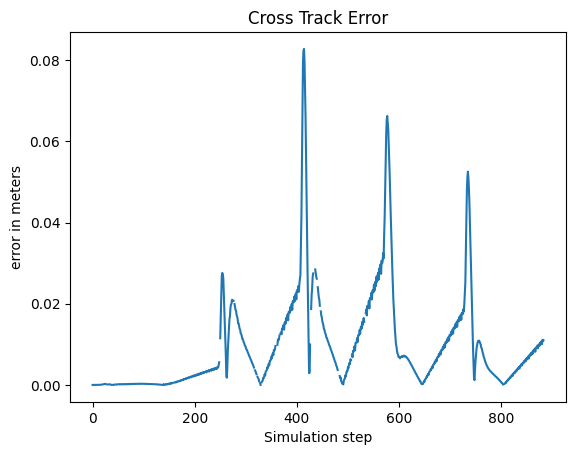

In [28]:
sim.plot_error()

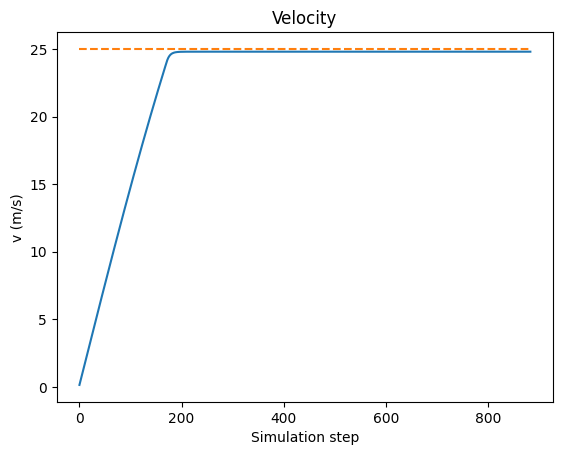

In [29]:
sim.plot_velocity()

In [30]:
import imageio
if viz.value=="None":
  img_list = [np.uint8(np.zeros((100,100,3)))]
imageio.mimsave('control.gif', img_list, fps=20)

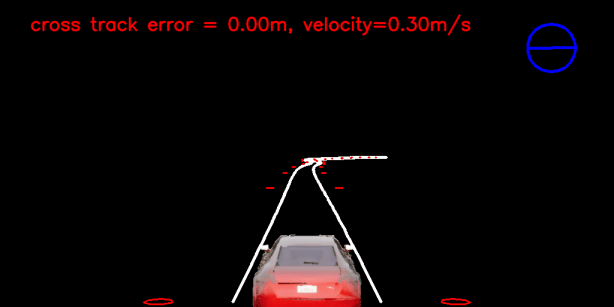

In [31]:
from IPython.display import Image
Image(open('control.gif','rb').read())